# Decision Tree

Decision Tree는 최대한 좋은 성능을 내기 위해서 트리의 매 노드마다 특정 클래스가 가지는 공통된 특성을 파악하여 분할할 필요가 있다. 따라서 불순도(imputity), 불확실성(uncertainty)를 최소화하는 방향으로 학습을 진행한다. 불순도는 특정 클래스가 얼마나 섞여있는지를 나타내는 지표이기에, 데이터가 고르게 섞여있어 분류하기 어려울수록 불순도가 높다고 볼 수 있다.

이러한 과정을 정보획득(information gain)이라고 부르기도 한다.

Decision tree에서는 가장 정보를 많이 얻을 수 있는 규칙을 찾기 위해 불확실성을 수치화한 후, 규칙을 적용하기 전후의 불확실성 차를 최대화하는 규칙을 적용한다. 데이터의 불확실성을 나타내는 지표로는 대표적으로 **엔트로피**와 **지니 계수**가 있다.

- 엔트로피(entropy) : 불순도를 측정하는 방법으로, 엔트로피가 높을수록 불확실성이 높다는 것을 의미한다. 엔트로피는 다음과 같이 정의된다. 여기서 $p(x_i)$는 범주 $x_i$에 속하는 데이터의 비율을 의미한다.
$$H(X) = -\sum_{i=1}^{n}p(x_i)\, \log \, p(x_i)$$

- 지니계수(Gini index) : 불순도를 측정하는 방법으로, 지니계수가 높을수록 불확실성이 높다는 것을 의미한다. 지니계수는 다음과 같이 정의된다.
$$\mathrm{Gini}(X) = 1 - \sum_{i=1}^{n}p(x_i)^2$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [2]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"], 
                                                    test_size=0.2, random_state=42, stratify=data["target"])

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


### entropy를 활용한 분류

In [3]:
# entropy
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



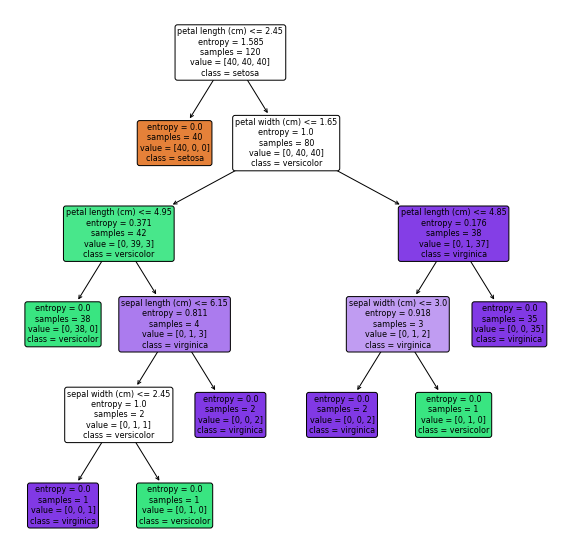

In [4]:
plt.figure(figsize=(10, 10))
plot_tree(decision_tree, filled=True, rounded=True, feature_names=data["feature_names"], class_names=data["target_names"])
plt.show()

### gini를 활용한 분류

In [5]:
# gini
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



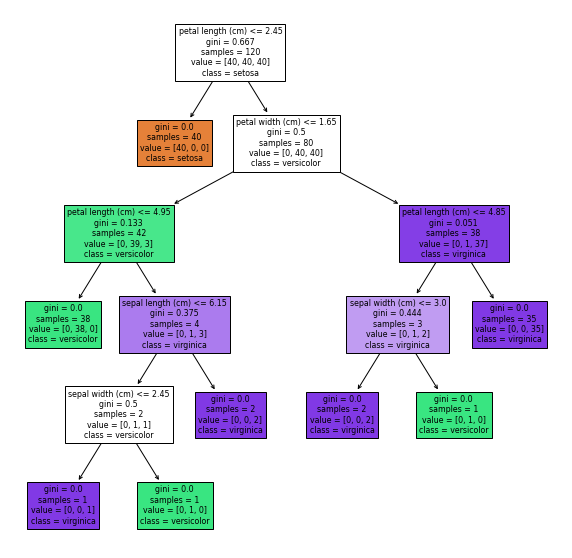

In [6]:
plt.figure(figsize=(10, 10))
plot_tree(decision_tree, filled=True, feature_names=data["feature_names"], class_names=data["target_names"])
plt.show()

### Pruining

In [7]:
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



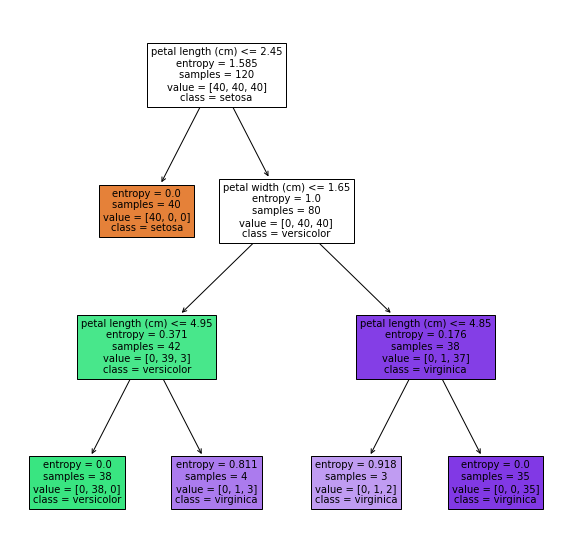

In [8]:
plt.figure(figsize=(10, 10))
plot_tree(decision_tree, filled=True, feature_names=data["feature_names"], class_names=data["target_names"])
plt.show()

+ 재귀적 분할(recursive partitioning) : 하나의 노드 내에서 하나의 변수 값을 기준으로 분기하여 새로 생성된 자식 노드들의 동질성이 최대화 되도록 분기점을 선택하는 방법